In [ ]:
#Antes de nada añadimos las bibliotecas correspondientes para poder hacer la práctica.

In [1]:
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib 

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature

In [2]:
#APARTADO 1: MUESTRO POR PANTALLA LAS IMAGENES.

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (2400, 7200)
Número de píxels:  17280000


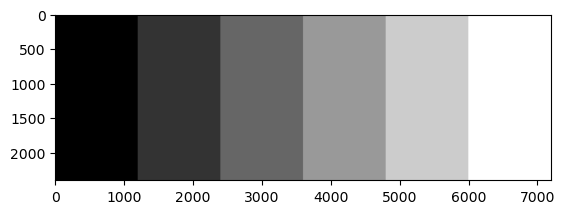

In [3]:
img1 = 'images/gray_bands.tif'
img_1  = Image.open(img1)
img_np1 = np.array(img_1) #convierto la imagen a numpy
print('Tipo de datos: ', img_np1.dtype)
print('Tamaño de imagen (filas, columnas): ', img_np1.shape) #tamaño de la imagen
print('Número de píxels: ', img_np1.size) #numero de pixeles
plt.imshow(img_1,cmap='gray'); #muestro por pantalla

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (834, 1114)
Número de píxels:  929076


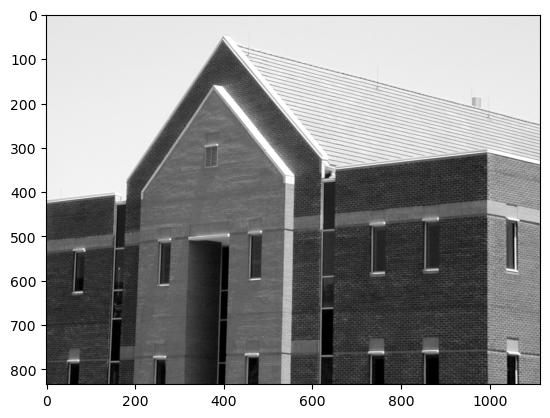

In [4]:
img2 = 'images/building.tif'
img_2  = Image.open(img2)
img_np2 = np.array(img_2) #convierto la imagen a numpy
print('Tipo de datos: ', img_np2.dtype)
print('Tamaño de imagen (filas, columnas): ', img_np2.shape) #tamaño de la imagen
print('Número de píxels: ', img_np2.size) #numero de pixeles
plt.imshow(img_2,cmap='gray'); #muestro por pantalla

Tipo de datos:  uint8
Tamaño de imagen (filas, columnas):  (512, 512)
Número de píxels:  262144


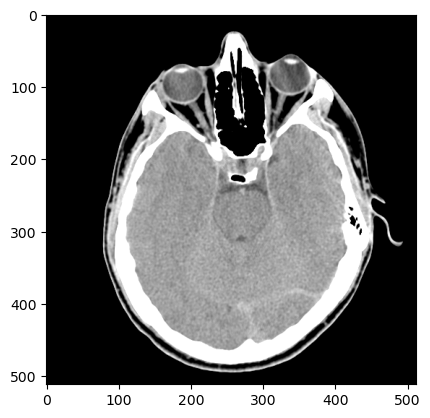

In [5]:
img3 = 'images/head_CT.tif'
img_3  = Image.open(img3)
img_np3 = np.array(img_3) #convierto la imagen a numpy
print('Tipo de datos: ', img_np3.dtype)
print('Tamaño de imagen (filas, columnas): ', img_np3.shape) #tamaño de la imagen
print('Número de píxels: ', img_np3.size) #numero de pixeles
plt.imshow(img_3,cmap='gray'); #muestro por pantalla

In [6]:
#APARTADO 2: USO UN OPERADOR DE GRADIENTE PARA REPRESENTARLO

In [7]:
#filtro prewitt

formato: TIFF
(ancho, alto) = (7200, 2400)
modo:  L


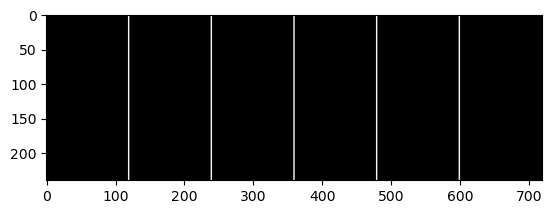

In [8]:
img1 = Image.open('images/gray_bands.tif')

print('formato:', img1.format)
print('(ancho, alto) =', img1.size)
print('modo: ', img1.mode)
img1 = img1.reduce(10) #en este caso reducimos para ver mejor los bordes. Tendrá peor definición, pero a la vista humana se verá mejor.
plt.figure()
plt.imshow(img1, cmap='gray')

img1 = np.array(img1, dtype='float')
img1 = img1/255
plt.imshow(filters.prewitt(img1), cmap='gray')

formato: TIFF
(ancho, alto) = (1114, 834)
modo:  L


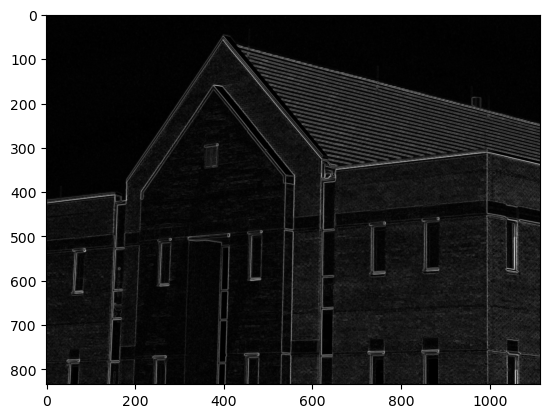

In [9]:
img2 = Image.open('images/building.tif')

print('formato:', img2.format)
print('(ancho, alto) =', img2.size)
print('modo: ', img2.mode)

plt.figure()
plt.imshow(img2, cmap='gray')

img2 = np.array(img2, dtype='float')
img2 = img2/255
plt.imshow(filters.prewitt(img2), cmap='gray')

formato: TIFF
(ancho, alto) = (512, 512)
modo:  L


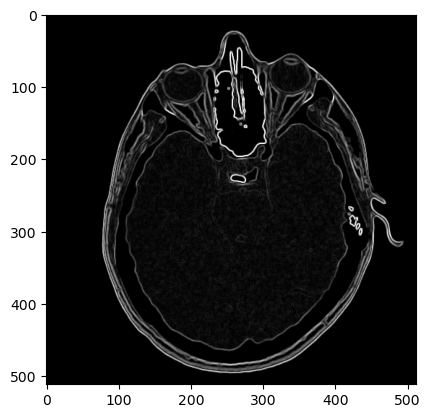

In [10]:
img3 = Image.open('images/head_CT.tif')

print('formato:', img3.format)
print('(ancho, alto) =', img3.size)
print('modo: ', img3.mode)

plt.figure()
plt.imshow(img3, cmap='gray')

img3 = np.array(img3, dtype='float')
img3 = img3/255
plt.imshow(filters.prewitt(img3), cmap='gray')



In [11]:
#filtro sobel

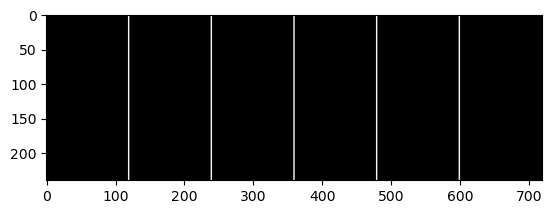

In [12]:
plt.imshow(sobel(img1),cmap='gray')

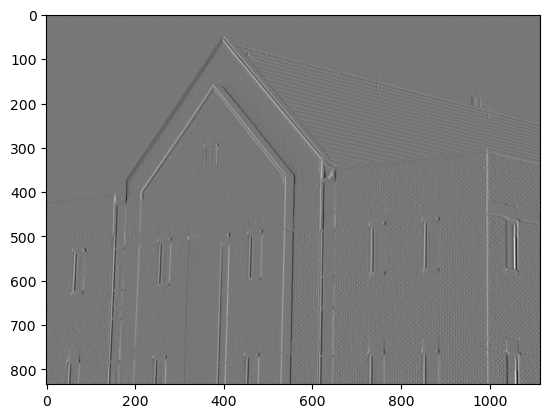

In [13]:
plt.imshow(sobel(img2),cmap='gray')

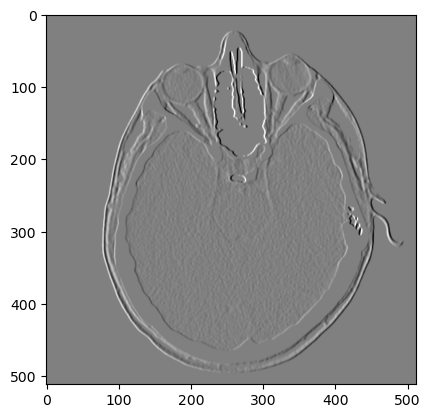

In [14]:
plt.imshow(sobel(img3),cmap='gray')

In [15]:
#filtro de la derivada gaussiana

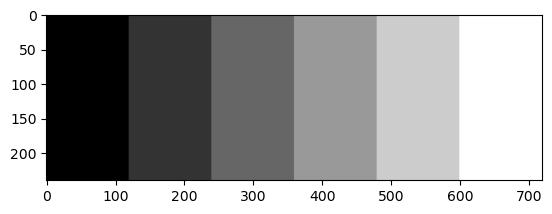

In [16]:
plt.imshow(gaussian_filter(img1, 0,1), cmap='gray') #cuanto mayor es el numero que ponemos detras de img1, mas borrosa se ve la img.

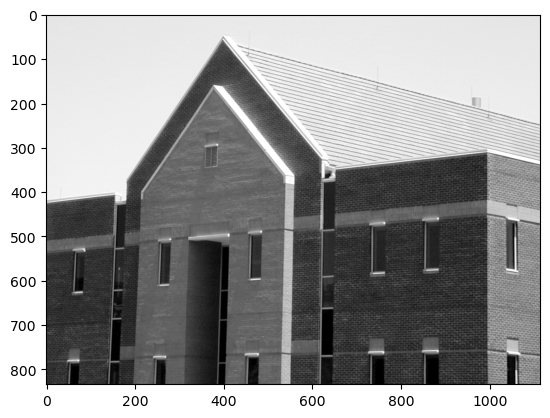

In [17]:
plt.imshow(gaussian_filter(img2, 0,1), cmap='gray')

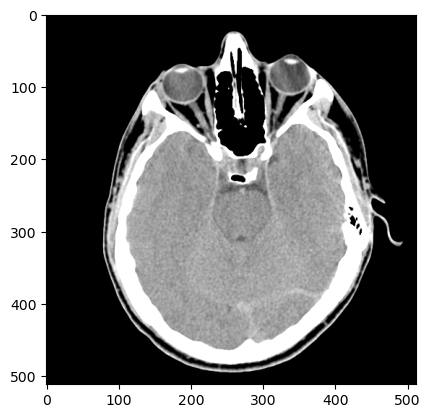

In [18]:
plt.imshow(gaussian_filter(img3, 0,1), cmap='gray')

In [19]:
#APARTADO 3: Detectar y representar los bordes con el operador de laplaciana

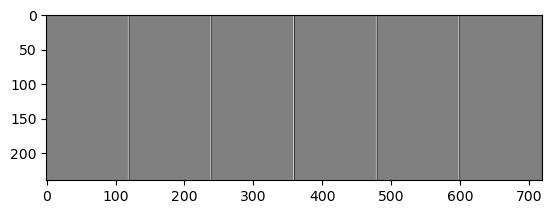

In [20]:
img1_lp = laplace(img1)
plt.imshow(img1_lp, cmap='gray')

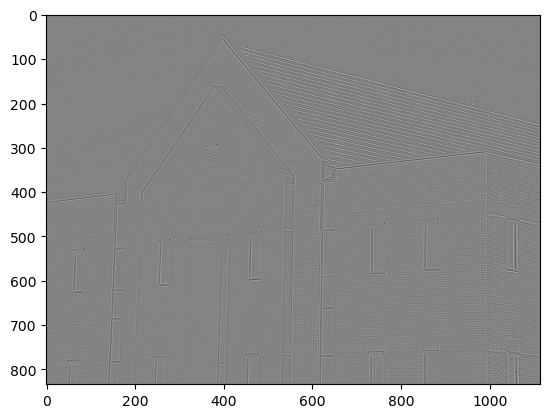

In [21]:
img2_lp = laplace(img2)
plt.imshow(img2_lp, cmap='gray')

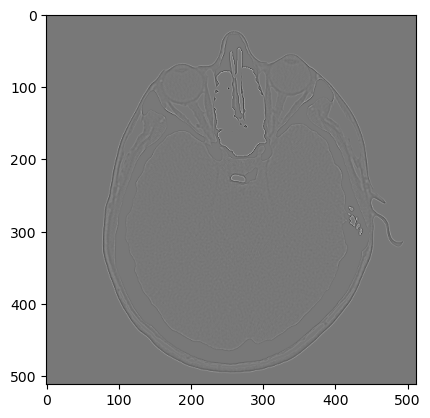

In [22]:
img3_lp = laplace(img3)
plt.imshow(img3_lp, cmap='gray')
#Al no añadirle reduccion a la imagen, con este filtro se aprecian bastante mal los bordes.

In [23]:
#APARTADO 4: Añadir ruido gaussiano a la imagen, de media cero y de desviación típica configurable por el usuario. Representar las imágenes

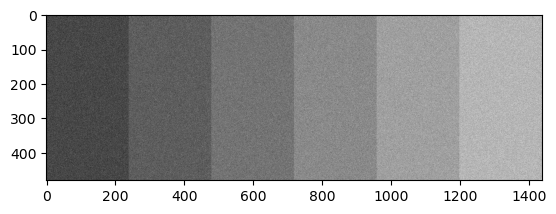

In [24]:
#ejecuto los pasos desde 0
img1 = Image.open('images/gray_bands.tif') #Abrimos imagen 1

img1 = img1.reduce(5) #marco bien los bordes, aunque pierda un poco de calidad

img1 = np.array(img1, dtype='float') #Pasamos a numpy y a float
img1 = img1/255 #y la dividimos entre 255 para tener valores entre 0 y 1

r1 = np.random.normal(loc=0.0, scale=0.1, size=img1.shape) #le doy valor al ruido, cuanto mayor sea la desviacion típica, hay menor diferencia entre los distintos apartados
#r1 = np.random.normal(loc=0.0, scale=0.8, size=img1.shape) #si pongo eso, se verá muy mal la imagen
img1_r = img1 + r1
plt.imshow(img1_r, cmap='gray')



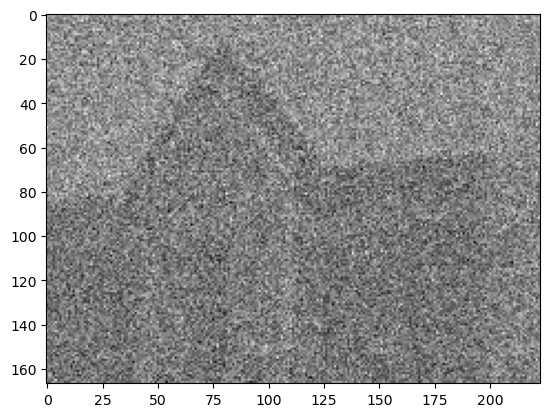

In [34]:
#ejecuto los pasos desde 0
img2 = Image.open('images/building.tif') #Abrimos imagen 2

img2 = img2.reduce(5) #marco bien los bordes, aunque pierda un poco de calidad

img2 = np.array(img2, dtype='float') #Pasamos a numpy y a float
img2 = img2/255 #y la dividimos entre 255 para tener valores entre 0 y 1

#r2 = np.random.normal(loc=0.0, scale=0.1, size=img2.shape) #le doy valor al ruido, cuanto mayor sea la desviacion típica, hay menor diferencia entre los distintos apartados
r2 = np.random.normal(loc=0.0, scale=0.8, size=img2.shape) #si pongo eso, se verá muy mal la imagen
img2_r = img2 + r2
plt.imshow(img2_r, cmap='gray')

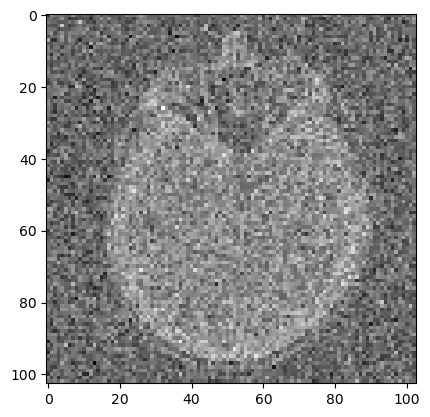

In [38]:
#ejecuto los pasos desde 0
img3 = Image.open('images/head_CT.tif') #Abrimos imagen 2

img3 = img3.reduce(5) #marco bien los bordes, aunque pierda un poco de calidad

img3 = np.array(img3, dtype='float') #Pasamos a numpy y a float
img3 = img3/255 #y la dividimos entre 255 para tener valores entre 0 y 1

r3 = np.random.normal(loc=0.0, scale=0.5, size=img3.shape) #le doy valor al ruido, cuanto mayor sea la desviacion típica, hay menor diferencia entre los distintos apartados
#r3 = np.random.normal(loc=0.0, scale=0.8, size=img3.shape) #si pongo eso, se verá muy mal la imagen
img3_r = img3 + r3
plt.imshow(img3_r, cmap='gray')

In [ ]:
#APARTADO 5. Aplicar los operadores de gradiente y laplaciana a las imágenes ruidosas. ¿Podemos detectar los bordes? Discutir el resultado

In [ ]:
#para aplicar los operadores de gradiente:

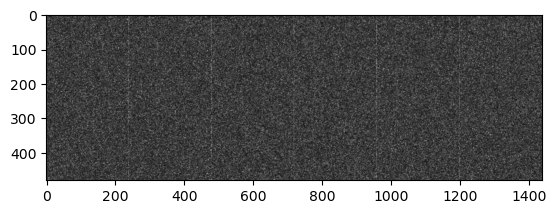

In [27]:
plt.imshow(filters.prewitt(img1_r), cmap='gray') #primero el prewitt de cada imagen


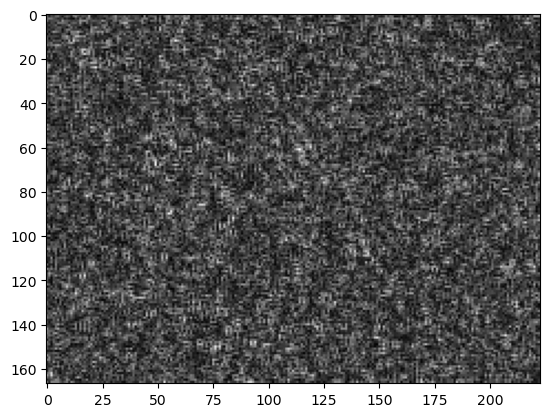

In [35]:
plt.imshow(filters.prewitt(img2_r), cmap='gray') #primero el prewitt de cada imagen


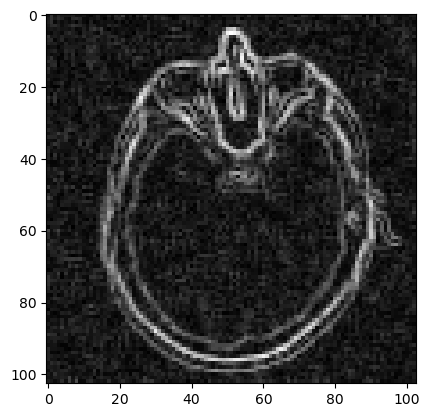

In [29]:
plt.imshow(filters.prewitt(img3_r), cmap='gray') #primero el prewitt de cada imagen


In [30]:
#ahora le aplico sobel


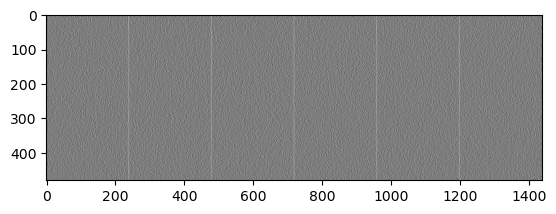

In [31]:
plt.imshow(sobel(img1_r),cmap='gray')

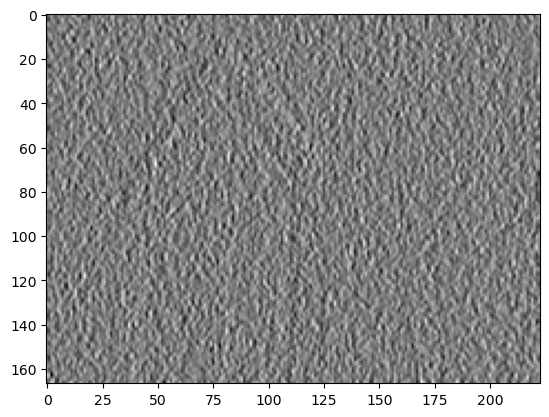

In [36]:
plt.imshow(sobel(img2_r),cmap='gray')

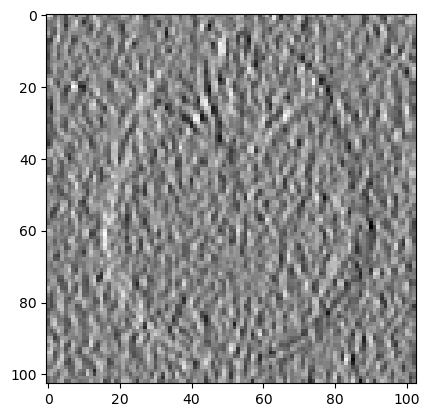

In [39]:
plt.imshow(sobel(img3_r),cmap='gray')

In [40]:
#Ahora hacemos por la gaussiana

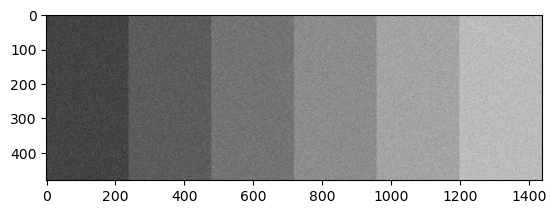

In [41]:
plt.imshow(gaussian_filter(img1_r, 0.4), cmap='gray')

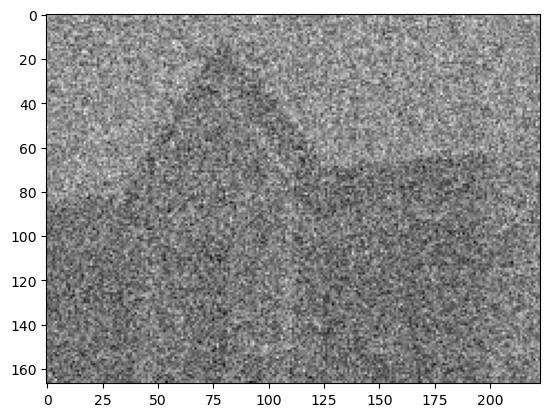

In [42]:
plt.imshow(gaussian_filter(img2_r, 0.4), cmap='gray')

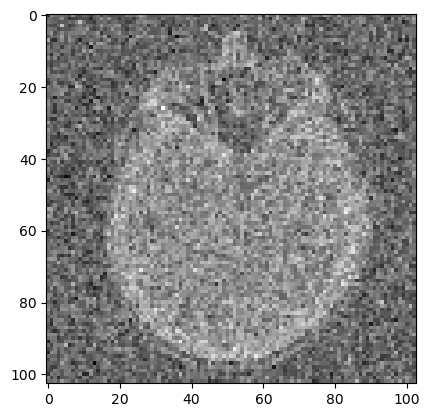

In [43]:
plt.imshow(gaussian_filter(img3_r, 0.4), cmap='gray')

In [44]:
#La derivada gaussiana es la que mejor se puede apreciar, con los otros filtros el ruido deforma mucho la imagen y no se puede llegar 
#a apreciar nada. 

In [45]:
#Por tanto con la que mejor se detectan bordes es con la gaussiana pero, lo que mas depende en que se detecte o no los bordes
# es la desviación tipica que le hemos puesto al declarar la imagen

In [46]:
#APARTADO 6:Aplicar un filtrado Gaussiano a la imagen antes de aplicar los operadores anteriores. 
#¿Podemos ahora detectar los bordes? Discutir el resultado

In [47]:
#A la imagen con ruido le aplicaremos el filtro gaussiano.


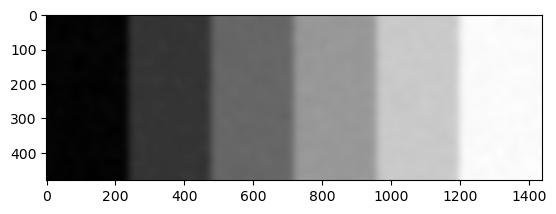

In [49]:
img1_gauss = gaussian_filter(img1_r, 10) #A mayor nivel de filtro, mayor difuminación
plt.imshow((img1_gauss),cmap='gray')

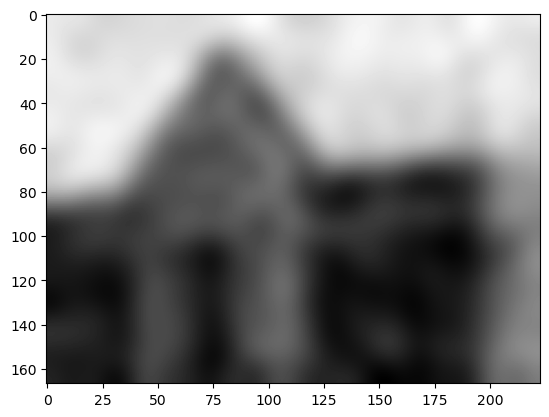

In [54]:
img2_gauss = gaussian_filter(img2_r, 7) #Aplicamos valor 7 para que se vea un poco la imagen
plt.imshow((img2_gauss),cmap='gray')

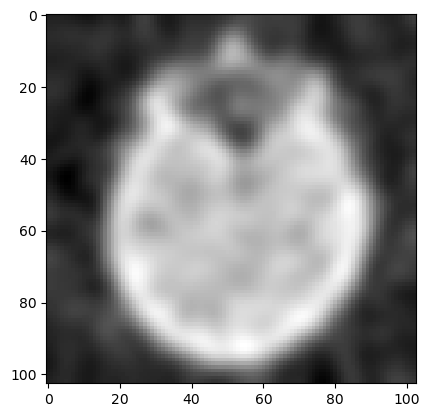

In [53]:
img3_gauss = gaussian_filter(img3_r, 3) #Aplicamos valor 3 para que se vea un poco la imagen
plt.imshow((img3_gauss),cmap='gray')

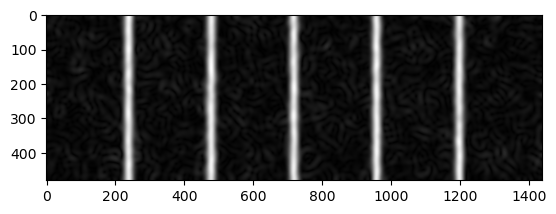

In [57]:
plt.imshow(filters.prewitt(img1_gauss), cmap='gray')


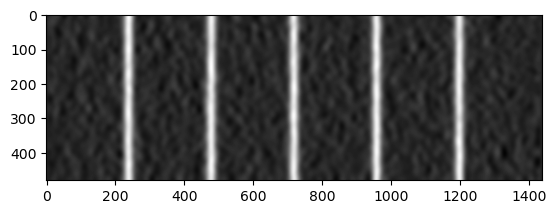

In [58]:
plt.imshow(sobel(img1_gauss),cmap='gray')


In [60]:
#Los bordes se detectan mucho mejor aplicando primero el filtro gaussiano

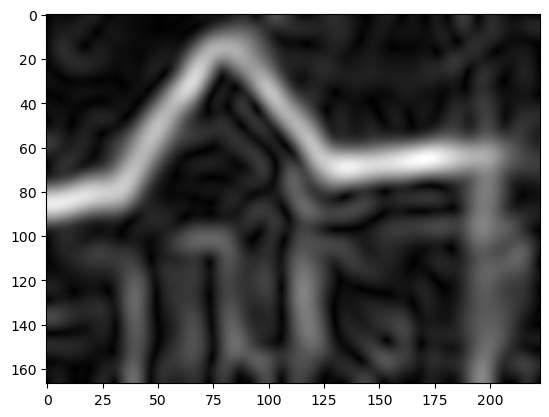

In [61]:
plt.imshow(filters.prewitt(img2_gauss), cmap='gray')


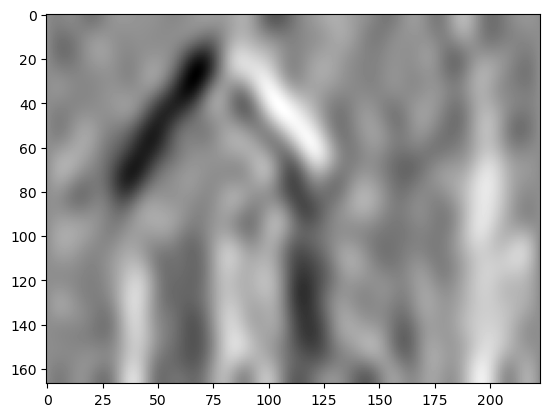

In [62]:
plt.imshow(sobel(img2_gauss),cmap='gray')

In [63]:
#En la foto 2, hay mucha diferencia. Con el prewitt se ven mucho mejor los bordes.

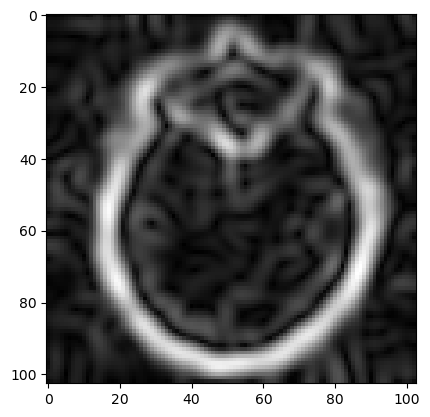

In [64]:
plt.imshow(filters.prewitt(img3_gauss), cmap='gray')

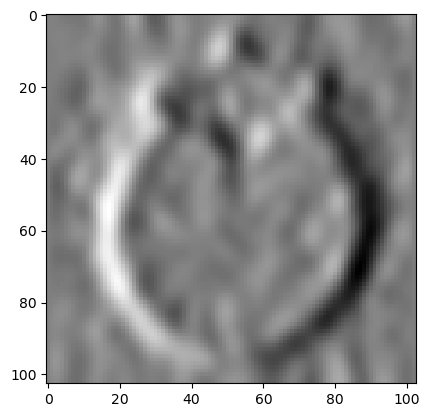

In [65]:
plt.imshow(sobel(img3_gauss),cmap='gray')

In [66]:
#En la foto 3, hay mucha diferencia. Con el prewitt se ven mucho mejor los bordes.

In [67]:
#APARTADO 7:La detección de bordes se resuelve con métodos que se fundamentan en lo visto en los apartados anteriores. Un algoritmo 
#muy conocido es el detector de Canny, que se ha presentado en clase. Aplicarlo a las dos imágenes reales (building.tif y 
#head_CT.tif). Discutir el resultado y los parámetros empleado

Text(0.5, 1.0, 'Img 2 filtro canny, $\\sigma=1$')

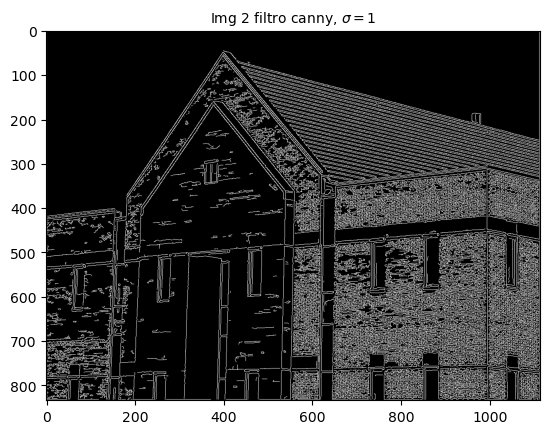

In [80]:
img2 = Image.open('images/building.tif')
img2 = np.array(img2, dtype='uint8')
edges1 = feature.canny(img2, sigma=1)
edges2 = feature.canny(img2, sigma=2)
edges3 = feature.canny(img2, sigma=3)
plt.imshow(edges1, cmap='gray')
plt.title(r'Img 2 filtro canny, $\sigma=1$', fontsize=10)
#Con este nos pretendemos quedarnos con los bordes, a mayor sigma, nos quedaremos con los bordes principales
#Aquí se puede apreciar que los bordes del tejado y de los ladrillos son relevantes con sigma= 1 
#El tejado solo con sigma=2 e irrelevantes cuando sigma=3 .

Text(0.5, 1.0, 'Img 2 filtro canny, $\\sigma=2$')

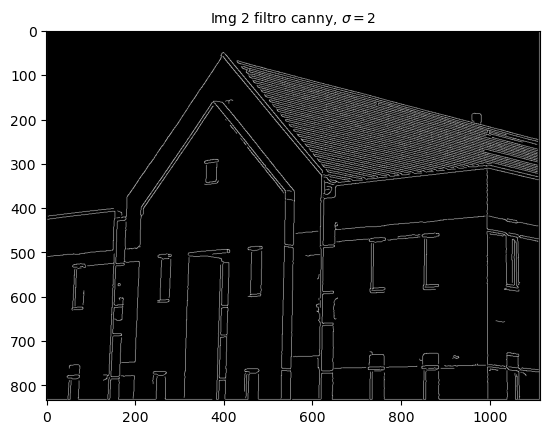

In [78]:
plt.imshow(edges2, cmap='gray')
plt.title(r'Img 2 filtro canny, $\sigma=2$', fontsize=10)

Text(0.5, 1.0, 'Img 2 filtro canny, $\\sigma=3$')

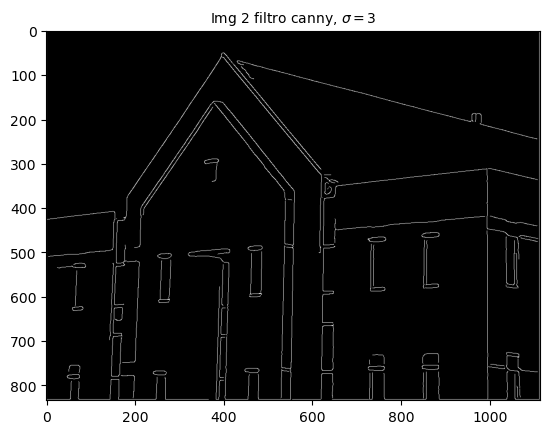

In [81]:
plt.imshow(edges3, cmap='gray')
plt.title(r'Img 2 filtro canny, $\sigma=3$', fontsize=10)

Text(0.5, 1.0, 'Imagen head_CT con Canny filter, $\\sigma=1$')

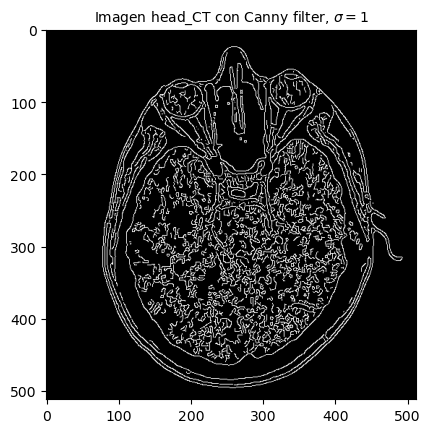

In [83]:
img3 = Image.open('images/head_CT.tif')
img3 = np.array(img3, dtype='uint8')
edges4 = feature.canny(img3, sigma=1)
edges5 = feature.canny(img3, sigma=4)
edges6 = feature.canny(img3, sigma=8)
plt.imshow(edges4, cmap='gray')
plt.title(r'Imagen head_CT con Canny filter, $\sigma=1$', fontsize=10)
#Aqui hemos realizado el mismo proceso. Primero con sigma=1 se aprecian todos los detalles
#Con sigma=4 solo se ven las lineas externas
#Con sigma=8 solo se ve la linea de fuera.

Text(0.5, 1.0, 'Imagen head_CT con Canny filter, $\\sigma=1$')

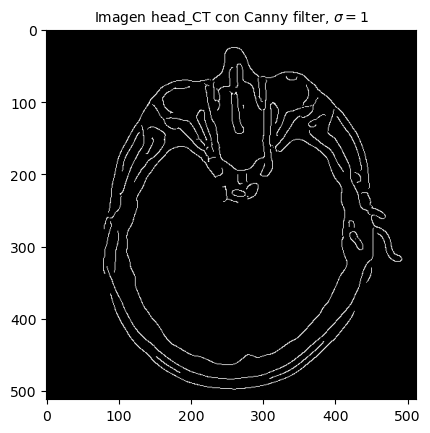

In [84]:
plt.imshow(edges5, cmap='gray')
plt.title(r'Imagen head_CT con Canny filter, $\sigma=1$', fontsize=10)

Text(0.5, 1.0, 'Imagen head_CT con Canny filter, $\\sigma=1$')

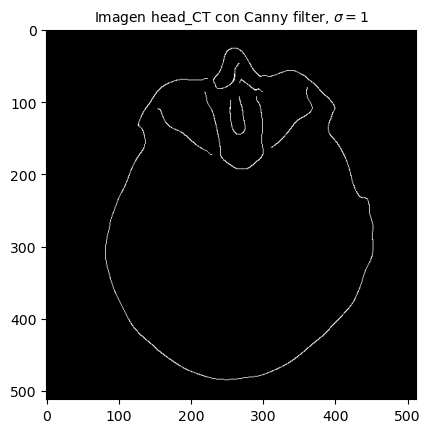

In [86]:
plt.imshow(edges6, cmap='gray')
plt.title(r'Imagen head_CT con Canny filter, $\sigma=1$', fontsize=10)